In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import copy
import matplotlib.cm as cm
from scipy.interpolate import interp2d
from scipy.ndimage.filters import gaussian_filter

In [ ]:
# make figure 2


# Define heatmap file
Poisson_Poisson = 'Outputs/TestSensitivity_Istart100Nexp10R02.000000_Dayspreinfectious3Dayspreinfectious4Dayssymptomatic4Testwait0Resultwait0Asymptomatics0.300000ChildLocationpoissonOffspringDistpoisson.txt'
tenbyten = Poisson_Poisson
x,y,z = make_raw_arrays(tenbyten)


# Now define paths to delayed simulations
delays = {2:{},3:{},4:{}}

delays[2]['filename'] = "Outputs/TestSensitivity_Istart100Nexp10R02.000000_Dayspreinfectious3Dayspreinfectious4Dayssymptomatic4Testwait1Resultwait1Asymptomatics0.300000ChildLocationpoissonOffspringDistpoisson.txt"
delays[3]['filename'] = "Outputs/TestSensitivity_Istart100Nexp10R02.000000_Dayspreinfectious3Dayspreinfectious4Dayssymptomatic4Testwait2Resultwait1Asymptomatics0.300000ChildLocationpoissonOffspringDistpoisson.txt"
delays[4]['filename'] = "Outputs/TestSensitivity_Istart100Nexp10R02.000000_Dayspreinfectious3Dayspreinfectious4Dayssymptomatic4Testwait3Resultwait1Asymptomatics0.300000ChildLocationpoissonOffspringDistpoisson.txt"



for key in delays.keys() :
    delays[key]['x'],delays[key]['y'],delays[key]['z']= make_raw_arrays(delays[key]['filename'])
    delays[key]['X'],delays[key]['Y'],delays[key]['Z'] = make_cbar_arrays(delays[key]['x'],delays[key]['y'],delays[key]['z'])
    delays[key]['ydict'] = { delays[key]['Y'][i][0] : delays[key]['Z'][i][0] for i in range(0, len(delays[key]['Z']) ) }
contours = get_contours(x,y,z,delays)


for key in delays.keys() :
    delays[key]['X'],delays[key]['Y'],delays[key]['Z'] = make_cbar_arrays(np.array(contours[key]['x']),np.array(contours[key]['y']),np.array(contours[key]['z']))

    
    
# PLOT
for key in delays.keys() :
    delays[key]['x'],delays[key]['y'],delays[key]['z'] = make_raw_arrays(delays[key]['filename'])

    delays[key]['X'],delays[key]['Y'],delays[key]['Z'] = make_cbar_arrays(delays[key]['x'],delays[key]['y'],delays[key]['z'])
    delays[key]['ydict'] = { delays[key]['Y'][i][0] : delays[key]['Z'][i][0] for i in range(0, len(delays[key]['Z']) ) }
contours = get_contours(x,y,z,delays)


for key in delays.keys() :
    delays[key]['X'],delays[key]['Y'],delays[key]['Z'] = make_cbar_arrays(np.array(contours[key]['x']),np.array(contours[key]['y']),np.array(contours[key]['z']))


x,y,z = make_raw_arrays(tenbyten)
contours = get_contours(x,y,z,delays)
X,Y,Z = make_cbar_arrays(x,y,z)




# Plot the figure
make_fig2(X,Y,Z,delays,figname='Fig2')

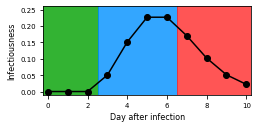

In [4]:
# Make Fig 1 B


import math
poisson = [0,0,0]
uniform = [0,0,0]
mean = 3
denominator = 0
for day in range (8) :
    poisson.append(mean**day/math.factorial(day)*math.exp(-mean))
    denominator += mean**day/math.factorial(day)*math.exp(-mean)
    
    uniform.append(1/8)

poisson = np.array(poisson)/denominator


SMALL_SIZE = 7
MEDIUM_SIZE = 8#10


plt.figure(figsize=(3.6,3.6/2))

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels


myGreen = '#00a000ff'
myBlue = '#0090ffff'
myRed = '#ff2a2aff'



plt.fill_between(np.arange(-1,2.6,.1),-1,0.30,color=myGreen,alpha=0.8)
plt.fill_between(np.arange(2.5,6.6,.1),-1,0.30,color=myBlue,alpha=0.8)
plt.fill_between(np.arange(6.5,11.1,.1),-1,0.30,color=myRed,alpha=0.8)



plt.plot(poisson,'o-',color='k',label='Skæv')
#plt.plot(uniform,'o',color='C1',label='Flad')

plt.xlabel('Day after infection',fontsize=MEDIUM_SIZE)
plt.ylabel('Infectiousness',fontsize=MEDIUM_SIZE)
#plt.legend(loc=2,frameon=False,fontsize=14)
plt.tick_params(labelsize=12)
plt.ylim([-0.01,0.26])
plt.xlim([-0.25,10.25])

plt.tick_params(labelsize=SMALL_SIZE)
plt.tight_layout()
plt.savefig('Figures/Pinf(t).svg',dpi=400)